# Gradient Descent for Logistic Regression

In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

(0.0, 4.0, 0.0, 3.5)

Text(0, 0.5, '$x_1$')

Text(0.5, 0, '$x_0$')

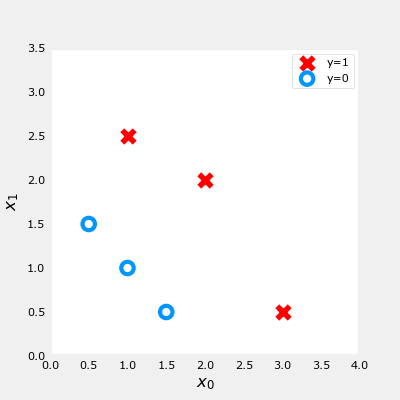

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [4]:
def compute_gradient_logistic(X,y,w,b):
    """
    Computes the gradient for logistic regression

    Args:
        X(ndarray(m,n)): Data, m examples with n features
        y(ndarray(m,)): target values
        w(ndarray(n,)): model parameters
        b(scalar): model parameter
    
    Returns
        dj_dw(ndarray(n,)): The gradient of the cost w.r.t the parameters w
        dj_db(scalar): The gradient of the cost w.r.t the parameter b
    """

    m,n=X.shape
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        f_wb_i=sigmoid(np.dot(X[i],w)+b)
        err_i=f_wb_i-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err_i*X[i,j]
        dj_db=dj_db+err_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_db,dj_dw

In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [8]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial value of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """

    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in

    for i in range(num_iters):
        dj_db,dj_dw=compute_gradient_logistic(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<10000:
            J_history.append(compute_cost_logistic(X,y,w,b))
        
        if i%math.ceil(num_iters/10)==0:
            print(f"iteration{i:4d}: Cost{J_history[-1]}")
    
    return w,b,J_history

In [9]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

iteration   0: Cost0.684610468560574
iteration1000: Cost0.1590977666870457
iteration2000: Cost0.08460064176930078
iteration3000: Cost0.05705327279402531
iteration4000: Cost0.04290759421682
iteration5000: Cost0.03433847729884557
iteration6000: Cost0.02860379802212006
iteration7000: Cost0.02450156960879306
iteration8000: Cost0.02142370332569295
iteration9000: Cost0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837


Text(0, 0.5, '$x_1$')

Text(0.5, 0, '$x_0$')

(0.0, 4.0, 0.0, 3.5)

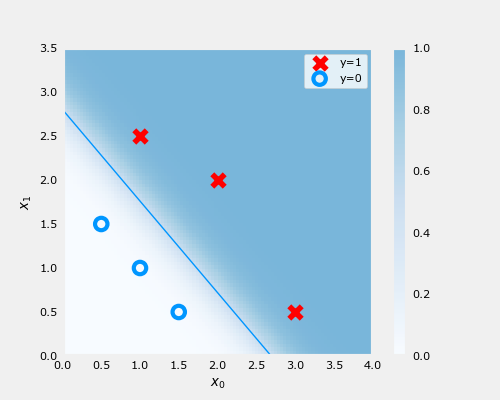

In [10]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

In [12]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

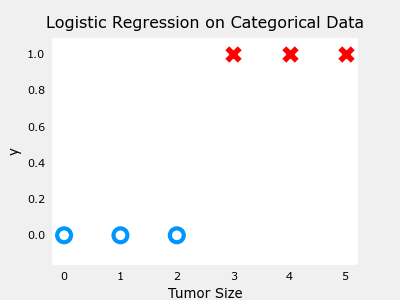

In [13]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

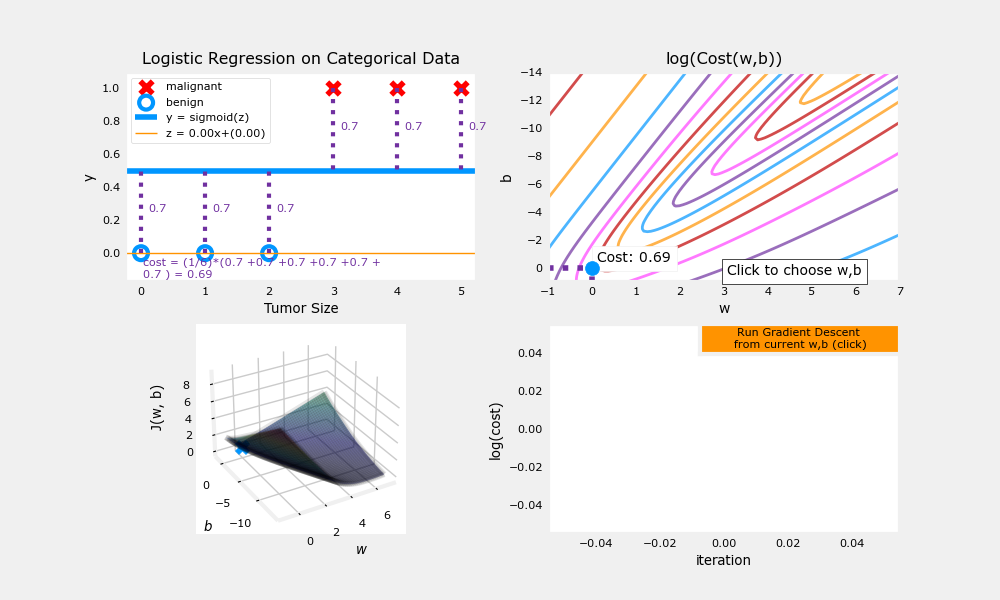

In [14]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic( x_train, y_train, w_range, b_range )